In [3]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np
# Loading your IBM Q account(s)
IBMQ.load_accounts()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqprovider.py:269: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


In [4]:
zero_qubit=np.matrix('1; 0')
one_qubit=np.matrix('0; 1')

In [18]:
def zero_to_one_qubit(percentage_zero,percentage_one, firstPositive=True, secondPositive=True):
     firstFactor = 1
     if not firstPositive:
        firstFactor = -1
     secondFactor = 1
     if not secondPositive:
        secondFactor = -1
     if not percentage_zero+percentage_one==100 or percentage_zero<0 or percentage_one<0:
            raise Exception("percentages must add up to 100\% and both be positive ")
     return firstFactor*np.sqrt(percentage_zero/100.)*zero_qubit+secondFactor*np.sqrt(percentage_one/100.)*one_qubit

## Question 1

In [7]:
print(zero_to_one_qubit(25, 75))
print(zero_to_one_qubit(12.5, 87.5))
print(zero_to_one_qubit(100, 0))
print(zero_to_one_qubit(0, 100))

[[0.5      ]
 [0.8660254]]
[[0.35355339]
 [0.93541435]]
[[1.]
 [0.]]
[[0.]
 [1.]]


One gets the square root of the percentage divided by 100. Calling it with 100% on either zero or 1 just gives back the zero or one qubit.

## Question 2

In [10]:
def qubit_to_percentages(qubit):
    return np.multiply(qubit, qubit) * 100

In [11]:
print(qubit_to_percentages(zero_to_one_qubit(25, 75)))

[[25.]
 [75.]]


## Question 3

|"↻"> = 1/√2 * (|"0"> + |"1">)

## Question 4

In [12]:
plus_qubit=1/np.sqrt(2)*np.matrix('1; 1')
minus_qubit=1/np.sqrt(2)*np.matrix('1; -1')
clockwisearrow_qubit=1/np.sqrt(2)*np.matrix([[1],[np.complex(0,1)]])    
counterclockwisearrow_qubit=1/np.sqrt(2)*np.matrix([[1],[-np.complex(0,1)]])
def get_bloch_coordinates(qubit):
    def get_x_bloch(qubit):
        qubit_x_basis=1./np.sqrt(2)*np.matrix('1 1; 1 -1')*qubit 
        prob_zero_qubit=(qubit_x_basis.item(0)*qubit_x_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_x_basis.item(1)*qubit_x_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit
        
    def get_y_bloch(qubit):
        qubit_y_basis=1./np.sqrt(2)*np.matrix('1 1; 1 -1')*np.matrix([[1,0],[0,-np.complex(0,1)]])*qubit
        prob_zero_qubit=(qubit_y_basis.item(0)*qubit_y_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_y_basis.item(1)*qubit_y_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit
    
    def get_z_bloch(qubit):
        qubit_z_basis=qubit
        prob_zero_qubit=(qubit_z_basis.item(0)*qubit_z_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_z_basis.item(1)*qubit_z_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit
    return (get_x_bloch(qubit),get_y_bloch(qubit),get_z_bloch(qubit))

In [13]:
print('|"0"> coordinates are:',get_bloch_coordinates(zero_qubit))
print('|"1"> coordinates are:',get_bloch_coordinates(one_qubit))
print('|"+"> coordinates are:',get_bloch_coordinates(plus_qubit))
print('|"-"> coordinates are:',get_bloch_coordinates(minus_qubit))
print('|"↻"> coordinates are:',get_bloch_coordinates(clockwisearrow_qubit))
print('|"↺"> coordinates are:',get_bloch_coordinates(counterclockwisearrow_qubit))

|"0"> coordinates are: (0.0, 0.0, 1)
|"1"> coordinates are: (0.0, 0.0, -1)
|"+"> coordinates are: (0.9999999999999996, 0.0, 0.0)
|"-"> coordinates are: (-0.9999999999999996, 0.0, 0.0)
|"↻"> coordinates are: (0.0, 0.9999999999999996, 0.0)
|"↺"> coordinates are: (0.0, -0.9999999999999996, 0.0)


## Question 5

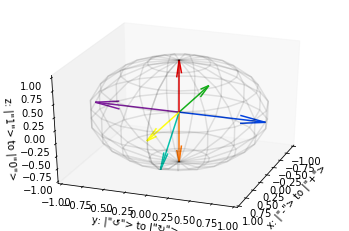

In [19]:
def plot_bloch(qubit,color='b',ax=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        # draw sphere
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        ax.plot_wireframe(x, y, z, color="k",alpha=.1)
        ax.grid(False)

    coordinates=get_bloch_coordinates(qubit)
    ax.quiver([0],[0],[0],[coordinates[0]],[coordinates[1]],[coordinates[2]],length=1,color=color,arrow_length_ratio=0.3)
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_xlabel('x: |"-"> to |"+">')
    ax.set_ylabel('y: |"↺"> to |"↻">')
    ax.set_zlabel('z: |"1"> to |"0">')
    ax.view_init(azim=20)
    return ax

# Plotting all of our basis qubits, colors and orientation match the textbook figure
ax=plot_bloch(zero_qubit,color='xkcd:red')
plot_bloch(one_qubit,color='xkcd:orange',ax=ax)
plot_bloch(plus_qubit,color='xkcd:yellow',ax=ax)
plot_bloch(minus_qubit,color='xkcd:green',ax=ax)
plot_bloch(clockwisearrow_qubit,color='xkcd:blue',ax=ax)
plot_bloch(counterclockwisearrow_qubit,color='xkcd:purple',ax=ax)

# Now plotting a qubit that is 10% |"0"> and 90% |"1"> in turquoise
plot_bloch(zero_to_one_qubit(10,90),color="xkcd:turquoise",ax=ax)



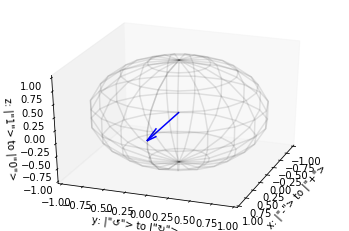

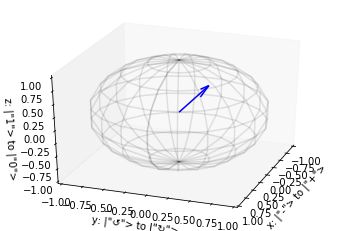

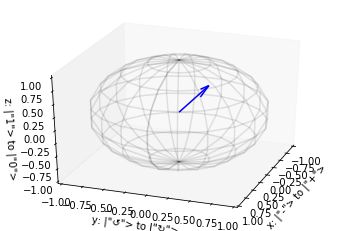

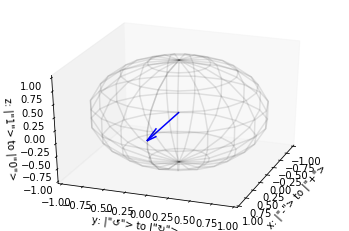

In [21]:
plot_bloch(zero_to_one_qubit(50, 50, firstPositive=True, secondPositive=True))
plot_bloch(zero_to_one_qubit(50, 50, firstPositive=True, secondPositive=False))
plot_bloch(zero_to_one_qubit(50, 50, firstPositive=False, secondPositive=True))
plot_bloch(zero_to_one_qubit(50, 50, firstPositive=False, secondPositive=False))

## Question 6

|"↻"> = 1/√2 * (|"+"> + |"-">)

|"↺"> = 1/√2 * (|"+"> - |"-">)

## Question 7

In [28]:
ten_ninety = zero_to_one_qubit(10, 90)
trans = 1/np.sqrt(2) * np.matrix([[1, 1], [1, -1]])
print(qubit_to_percentages(trans * ten_ninety))

[[80.]
 [20.]]


The qubit will measure 80% |"+"> and 20% |"-">